# EDA and Feature Engineering

## 1. Import Libraries

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# Set plot style
plt.style.use('ggplot')
sns.set_style('whitegrid')

## 2. Load Cleaned Dataset

In [15]:
df = pd.read_csv('../data/cleaned_sales_data.csv', parse_dates=['Order_Date'])
df.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680


## 3. Set 'Order Date' as Index

In [16]:
df.set_index('Order_Date', inplace=True)
df.head()

,Row_ID,Order_ID,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
Order_Date,,,,,,,,,,,,,,,,,
2017-11-08,1,CA-2017-152156,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
2017-11-08,2,CA-2017-152156,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2017-06-12,3,CA-2017-138688,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
2016-10-11,4,US-2016-108966,2016-10-18,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
2016-10-11,5,US-2016-108966,2016-10-18,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680


## 4. Time Series Analysis & Visualization

### Resample Sales Data

In [17]:
daily_sales = df['Sales'].resample('D').sum()
weekly_sales = df['Sales'].resample('W').sum()
monthly_sales = df['Sales'].resample('M').sum()

C:\Users\Planet\AppData\Local\Temp\ipykernel_30980\2573623783.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df['Sales'].resample('M').sum()


### Plot Sales Trends

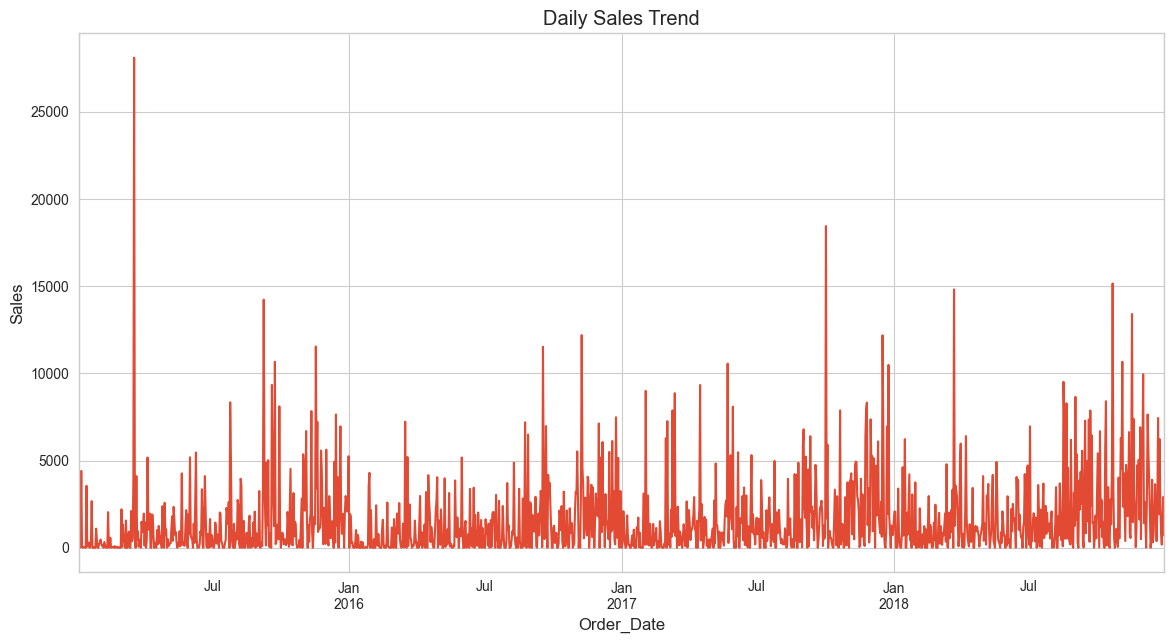

In [18]:
plt.figure(figsize=(14, 7))
daily_sales.plot(title='Daily Sales Trend')
plt.ylabel('Sales')
plt.show()

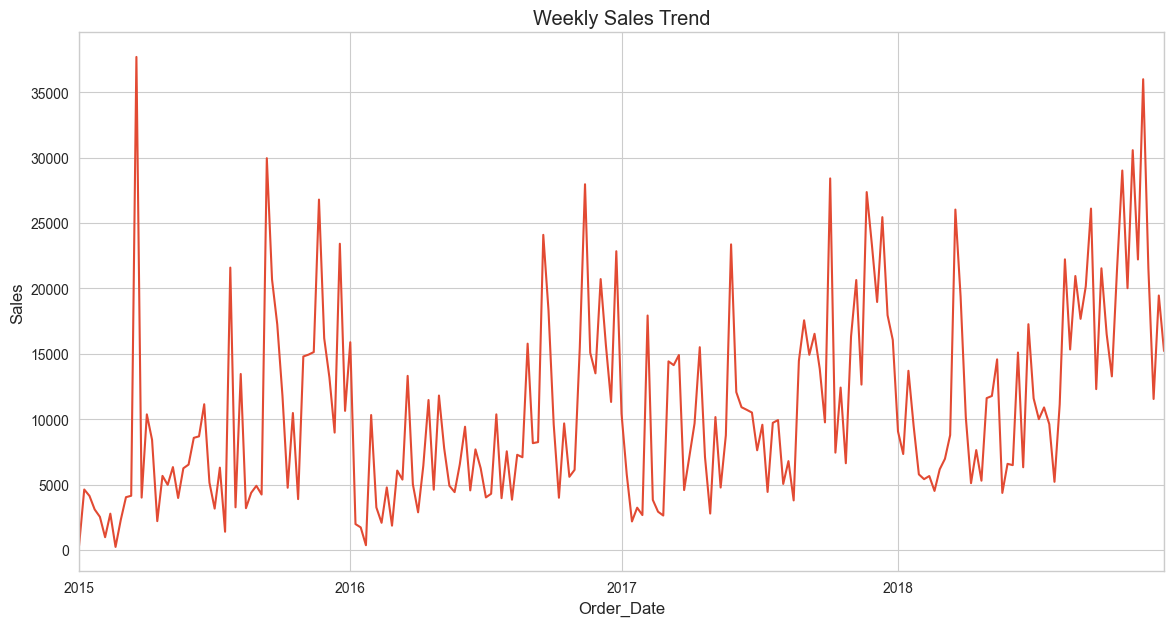

In [19]:
plt.figure(figsize=(14, 7))
weekly_sales.plot(title='Weekly Sales Trend')
plt.ylabel('Sales')
plt.show()

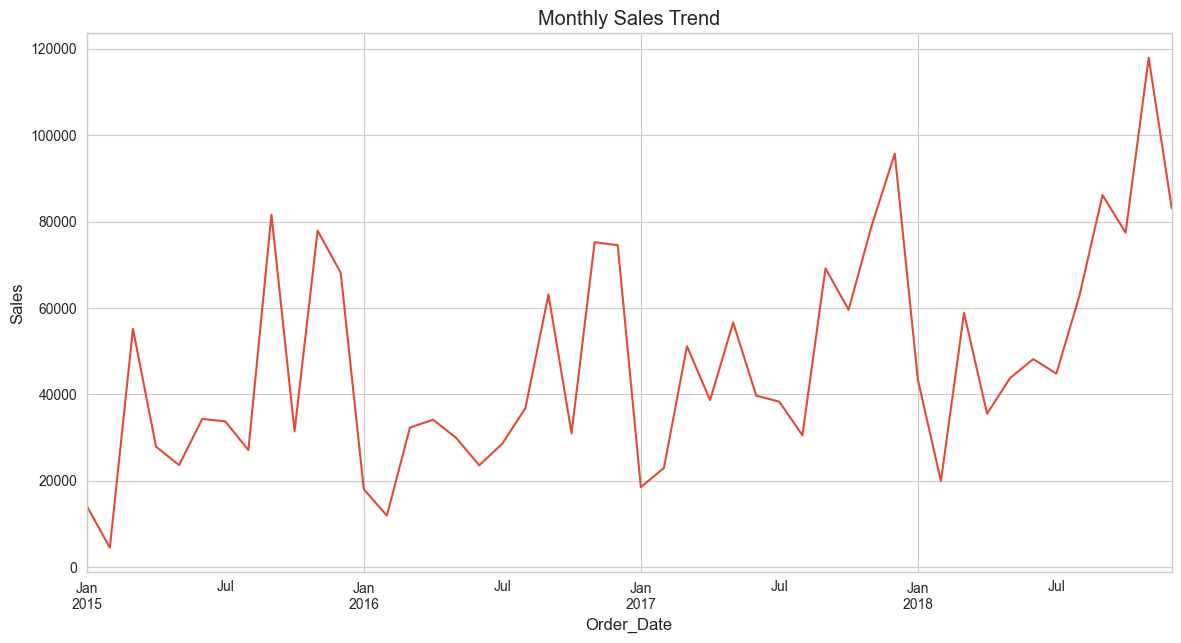

In [20]:
plt.figure(figsize=(14, 7))
monthly_sales.plot(title='Monthly Sales Trend')
plt.ylabel('Sales')
plt.show()

### Time Series Decomposition (Monthly)

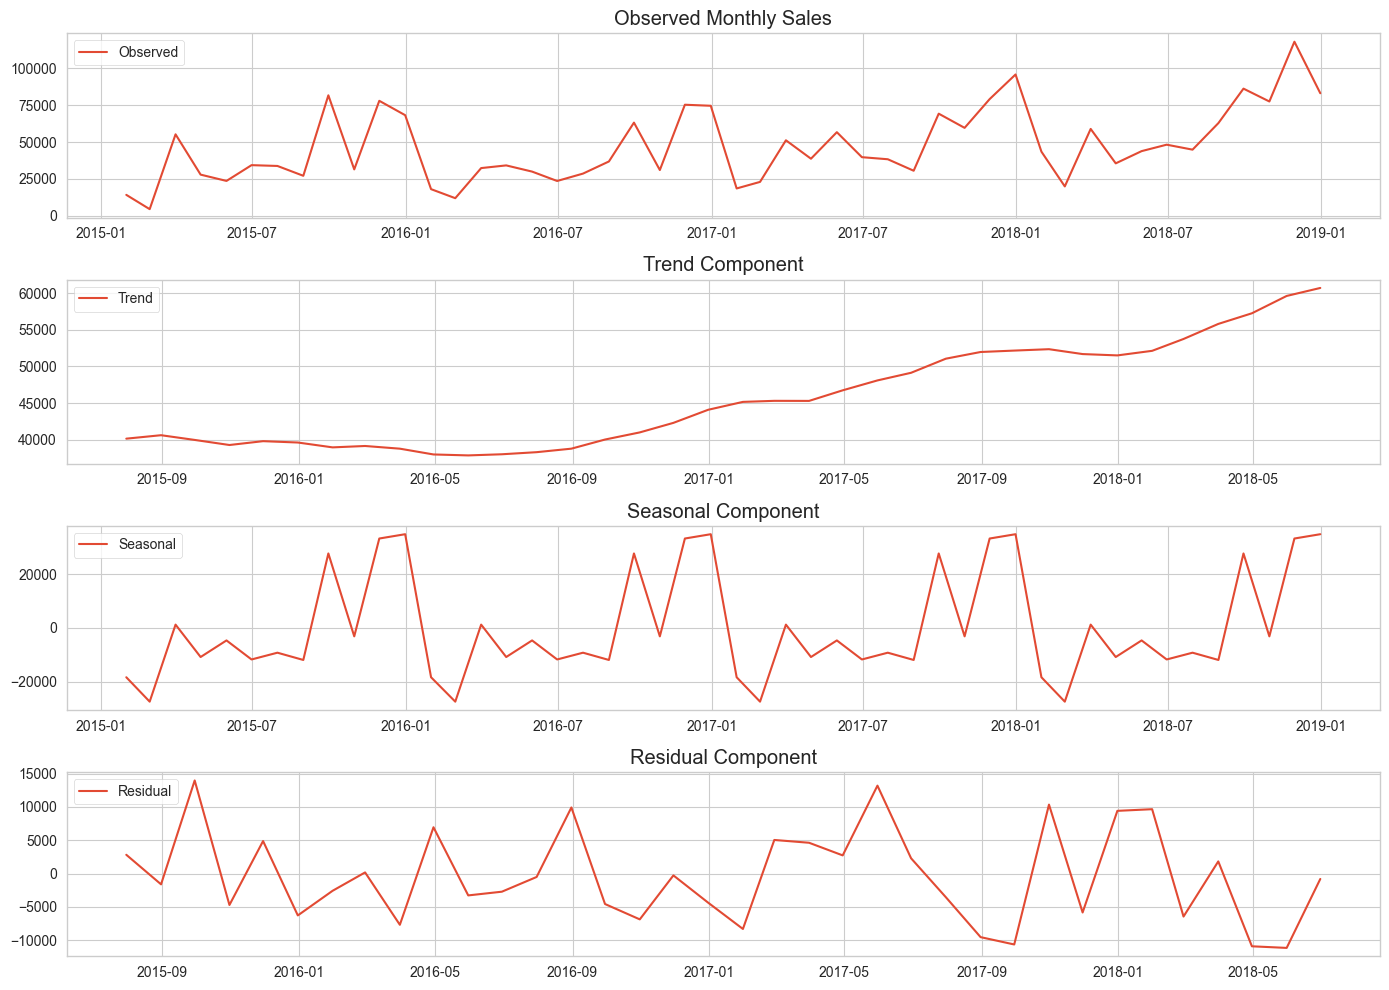

In [21]:
# Ensure monthly_sales has enough periods for decomposition (at least 2 full periods)
# For monthly data, this means at least 24 months.
if len(monthly_sales) >= 24:
    decomposition = seasonal_decompose(monthly_sales, model='additive', period=12)
    
    plt.figure(figsize=(14, 10))
    plt.subplot(411)
    plt.plot(decomposition.observed, label='Observed')
    plt.legend(loc='upper left')
    plt.title('Observed Monthly Sales')
    
    plt.subplot(412)
    plt.plot(decomposition.trend, label='Trend')
    plt.legend(loc='upper left')
    plt.title('Trend Component')
    
    plt.subplot(413)
    plt.plot(decomposition.seasonal, label='Seasonal')
    plt.legend(loc='upper left')
    plt.title('Seasonal Component')
    
    plt.subplot(414)
    plt.plot(decomposition.resid, label='Residual')
    plt.legend(loc='upper left')
    plt.title('Residual Component')
    
    plt.tight_layout()
    plt.show()
else:
    print("Monthly sales data has less than 24 periods, decomposition might not be meaningful or might fail.")
    # Fallback: Plot monthly sales if decomposition cannot be done
    plt.figure(figsize=(14, 7))
    monthly_sales.plot(title='Monthly Sales (Decomposition Skipped)')
    plt.ylabel('Sales')
    plt.show()

**Observations from Time Series Analysis:**
- *Daily sales show high volatility.*
- *Weekly sales provide a smoother trend, highlighting weekly cyclical patterns.*
- *Monthly sales reveal broader trends and seasonality. Sales tend to peak towards the end of the year (November and December) and also show some peaks mid-year (e.g., March, September). There's a general upward trend in sales over the years.*
- *The decomposition plot confirms a clear upward trend and a strong yearly seasonality. Residuals appear relatively stable, suggesting the additive model is appropriate.*

## 5. Sales Distribution Analysis & Visualization

### Total Sales by Categorical Variables

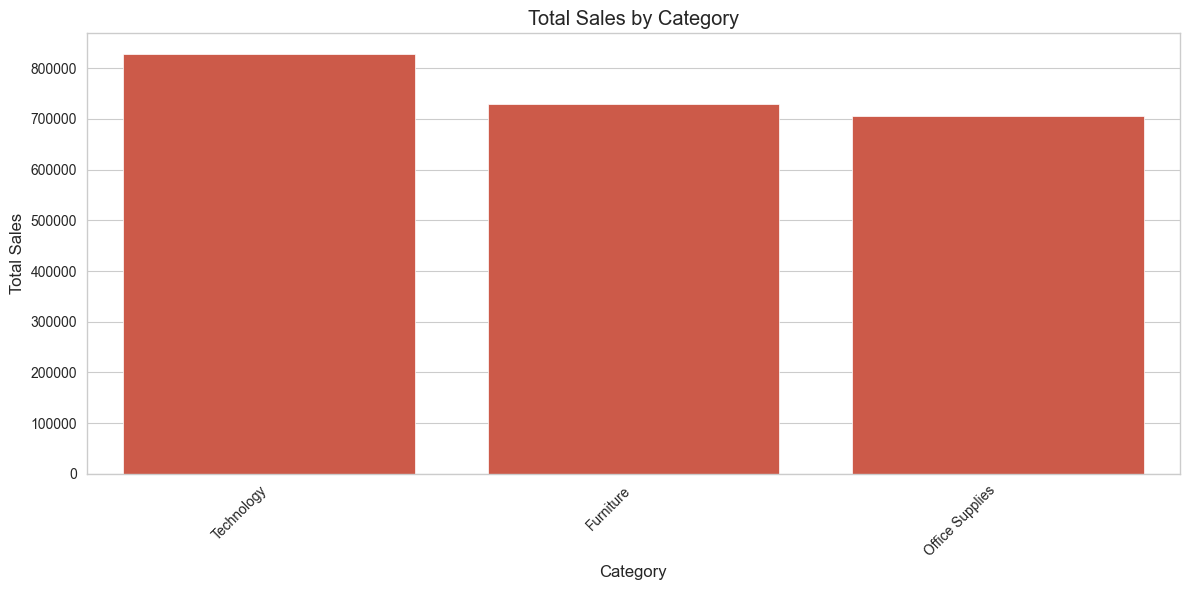

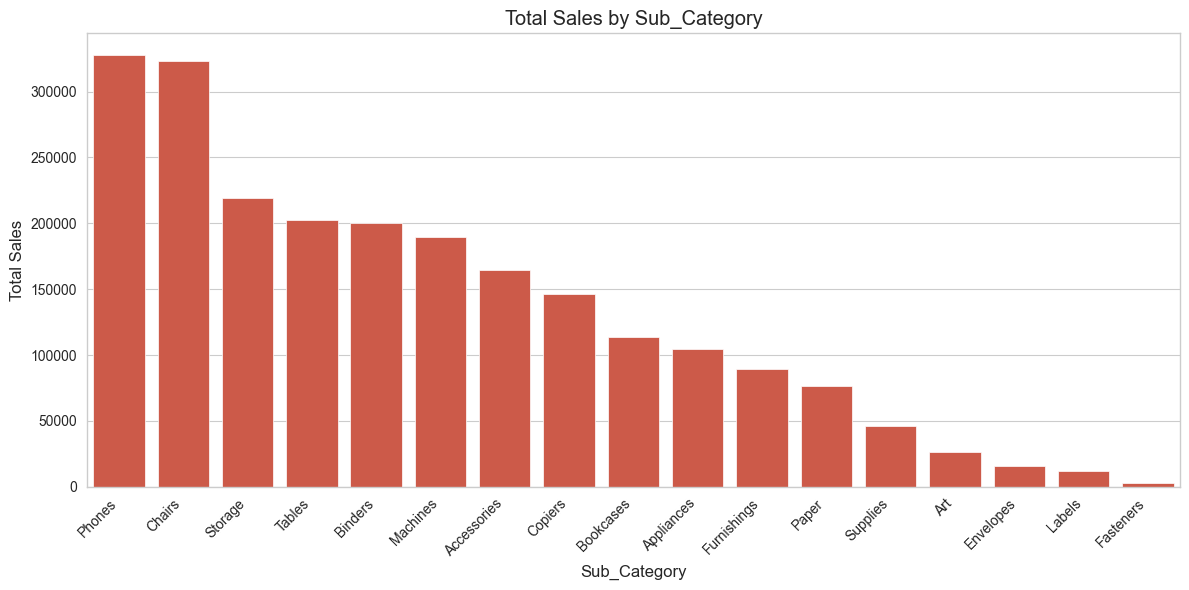

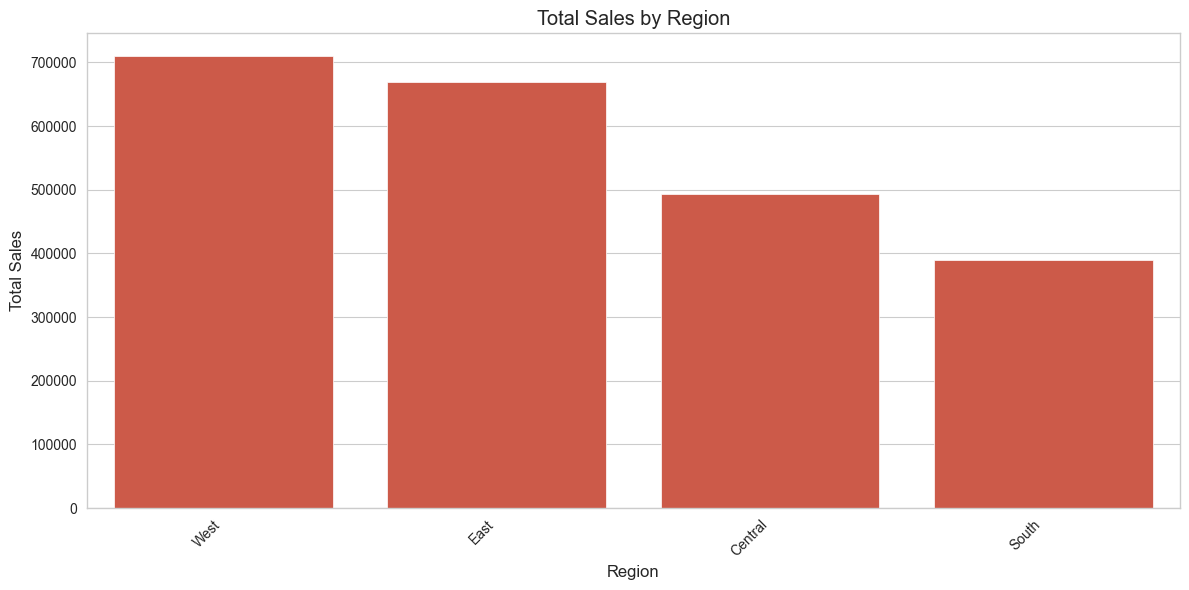

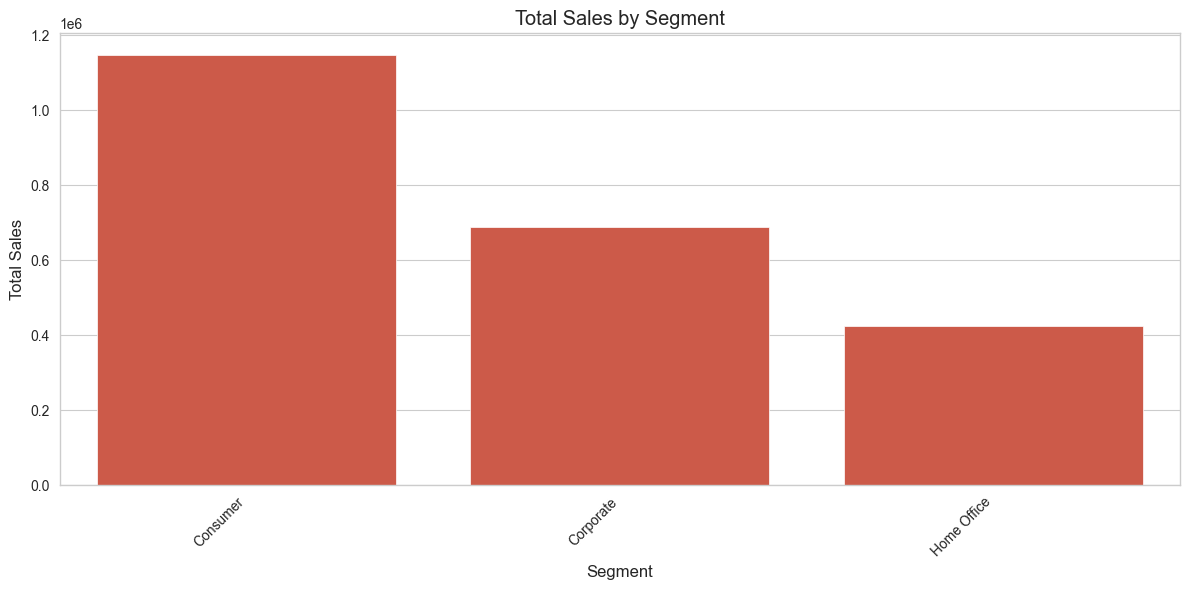

In [22]:
categorical_cols = ['Category', 'Sub_Category', 'Region', 'Segment']
for col in categorical_cols:
    plt.figure(figsize=(12, 6))
    sales_by_col = df.groupby(col)['Sales'].sum().sort_values(ascending=False)
    sns.barplot(x=sales_by_col.index, y=sales_by_col.values)
    plt.title(f'Total Sales by {col}')
    plt.xlabel(col)
    plt.ylabel('Total Sales')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

### Sales Distribution by Category and Region (Box Plots)

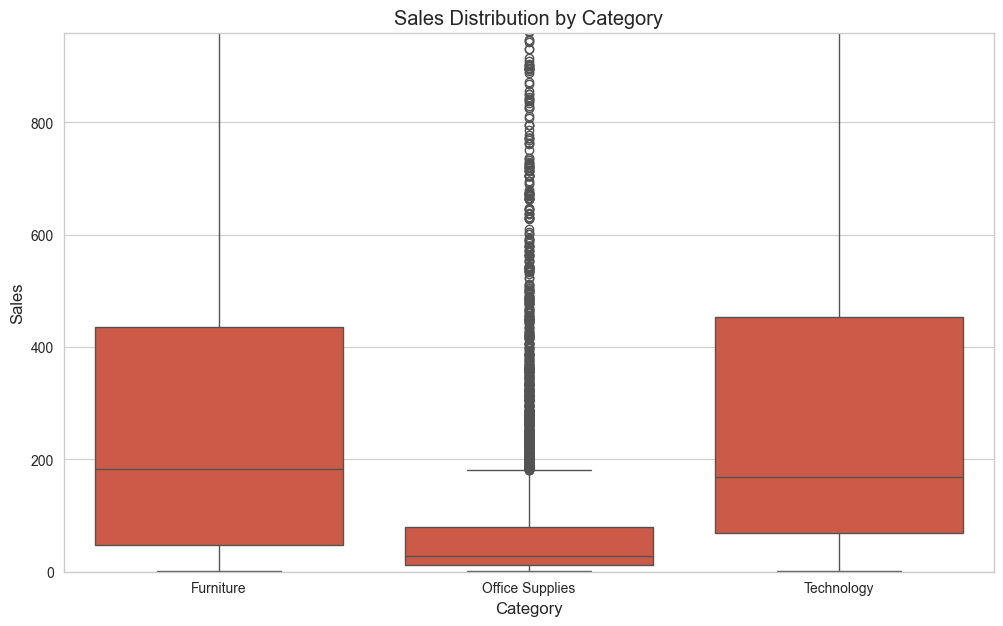

In [23]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Category', y='Sales', data=df)
plt.title('Sales Distribution by Category')
plt.ylabel('Sales')
plt.xlabel('Category')
plt.ylim(0, df['Sales'].quantile(0.95)) # Limiting y-axis to see distribution better, excluding extreme outliers
plt.show()

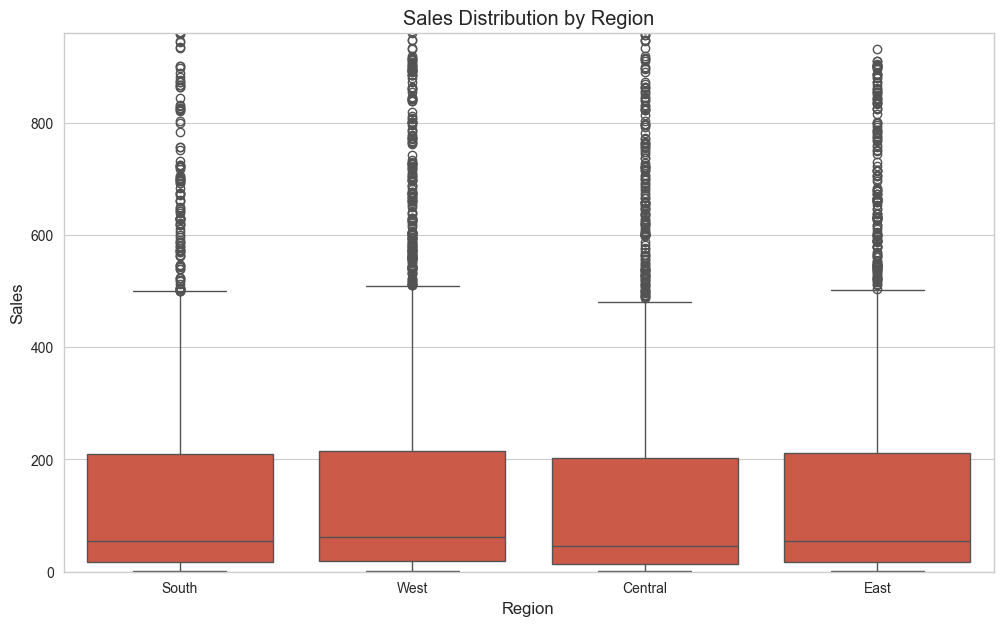

In [24]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Region', y='Sales', data=df)
plt.title('Sales Distribution by Region')
plt.ylabel('Sales')
plt.xlabel('Region')
plt.ylim(0, df['Sales'].quantile(0.95)) # Limiting y-axis
plt.show()

**Observations from Sales Distribution Analysis:**
- *'Technology' is the highest-grossing category, followed by 'Furniture' and then 'Office Supplies'.*
- *Within Sub-Categories, 'Phones' and 'Chairs' are top contributors to sales. 'Fasteners', 'Labels', and 'Art' have the lowest sales.*
- *The 'West' region has the highest total sales, followed by 'East', 'Central', and then 'South'.*
- *'Consumer' segment leads in sales, followed by 'Corporate' and 'Home Office'.*
- *Box plots show that while 'Technology' has higher median sales, it also has a wider spread and more high-value outliers. 'Office Supplies' generally has lower value sales but is very consistent. All regions show a skewed distribution with many lower value sales and some high-value outliers.*

## 6. Feature Engineering

### Create Time-Based Features

In [25]:
# The DataFrame's index is 'Order Date' (datetime object)
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Day'] = df.index.day
df['DayOfWeek'] = df.index.dayofweek # Monday=0, Sunday=6
df['Quarter'] = df.index.quarter
df['WeekOfYear'] = df.index.isocalendar().week.astype(int)
df.head()

,Row_ID,Order_ID,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,...,Category,Sub_Category,Product_Name,Sales,Year,Month,Day,DayOfWeek,Quarter,WeekOfYear
Order_Date,,,,,,,,,,,,,,,,,,,,,
2017-11-08,1,CA-2017-152156,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017,11,8,2,4,45
2017-11-08,2,CA-2017-152156,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017,11,8,2,4,45
2017-06-12,3,CA-2017-138688,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017,6,12,0,2,24
2016-10-11,4,US-2016-108966,2016-10-18,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016,10,11,1,4,41
2016-10-11,5,US-2016-108966,2016-10-18,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,...,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680,2016,10,11,1,4,41


### Create Lag Features for 'Sales'

In [26]:
# Resample to daily sum of sales to ensure one value per day for lags
daily_sales_for_lags = df['Sales'].resample('D').sum().fillna(0) # Fill missing days with 0 sales

# Create lag features on this daily series
df['Sales_Lag_1'] = daily_sales_for_lags.shift(1)
df['Sales_Lag_7'] = daily_sales_for_lags.shift(7)
df['Sales_Lag_30'] = daily_sales_for_lags.shift(30)

# Map these daily lags back to the original DataFrame (which might have multiple entries per day)
# This requires aligning the index. We can reindex the original df to include all days from daily_sales_for_lags
# then fill forward any new features, and finally select original index.
# However, a simpler approach for this context is to merge/join if the original df needs to keep its structure.
# For now, let's add these as new columns. This will introduce NaNs for rows where the date doesn't match a daily_sales_for_lags index.
# A better way is to create these features on a df that is already daily, then merge back if needed.

# Let's ensure df has these columns, filling NaNs that arise from original df not having all dates
# This will put the lagged daily sum onto each transaction for that day.
df = df.merge(daily_sales_for_lags.shift(1).rename('Sales_Lag_1_Daily'), left_index=True, right_index=True, how='left')
df = df.merge(daily_sales_for_lags.shift(7).rename('Sales_Lag_7_Daily'), left_index=True, right_index=True, how='left')
df = df.merge(daily_sales_for_lags.shift(30).rename('Sales_Lag_30_Daily'), left_index=True, right_index=True, how='left')

# Drop the temporary columns if they were just for calculation
if 'Sales_Lag_1' in df.columns: df.drop(columns=['Sales_Lag_1'], inplace=True)
if 'Sales_Lag_7' in df.columns: df.drop(columns=['Sales_Lag_7'], inplace=True)
if 'Sales_Lag_30' in df.columns: df.drop(columns=['Sales_Lag_30'], inplace=True)

df.rename(columns={'Sales_Lag_1_Daily': 'Sales_Lag_1', 
                   'Sales_Lag_7_Daily': 'Sales_Lag_7', 
                   'Sales_Lag_30_Daily': 'Sales_Lag_30'}, inplace=True)

# Fill NaN values that arise from lags (e.g., first few days)
df[['Sales_Lag_1', 'Sales_Lag_7', 'Sales_Lag_30']] = df[['Sales_Lag_1', 'Sales_Lag_7', 'Sales_Lag_30']].fillna(0)
df.head(10)

,Row_ID,Order_ID,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,...,Sales,Year,Month,Day,DayOfWeek,Quarter,WeekOfYear,Sales_Lag_1,Sales_Lag_7,Sales_Lag_30
Order_Date,,,,,,,,,,,,,,,,,,,,,
2017-11-08,1,CA-2017-152156,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,261.9600,2017,11,8,2,4,45,3810.464,453.374,546.920
2017-11-08,2,CA-2017-152156,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,731.9400,2017,11,8,2,4,45,3810.464,453.374,546.920
2017-06-12,3,CA-2017-138688,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,14.6200,2017,6,12,0,2,24,1623.416,659.820,0.000
2016-10-11,4,US-2016-108966,2016-10-18,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,...,957.5775,2016,10,11,1,4,41,1855.008,505.580,1962.130
2016-10-11,5,US-2016-108966,2016-10-18,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,...,22.3680,2016,10,11,1,4,41,1855.008,505.580,1962.130
2015-06-09,6,CA-2015-115812,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,...,48.8600,2015,6,9,1,2,24,2501.264,738.598,2343.799
2015-06-09,7,CA-2015-115812,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,...,7.2800,2015,6,9,1,2,24,2501.264,738.598,2343.799
2015-06-09,8,CA-2015-115812,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,...,907.1520,2015,6,9,1,2,24,2501.264,738.598,2343.799
2015-06-09,9,CA-2015-115812,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,...,18.5040,2015,6,9,1,2,24,2501.264,738.598,2343.799


### Create Rolling Mean Features for 'Sales'

In [27]:
# Use the daily_sales_for_lags series (sum of sales per day, 0 for no-sales days)
rolling_mean_7d = daily_sales_for_lags.rolling(window=7).mean().fillna(0)
rolling_mean_30d = daily_sales_for_lags.rolling(window=30).mean().fillna(0)

# Merge these daily rolling means back to the original df
df = df.merge(rolling_mean_7d.rename('Sales_Rolling_Mean_7D'), left_index=True, right_index=True, how='left')
df = df.merge(rolling_mean_30d.rename('Sales_Rolling_Mean_30D'), left_index=True, right_index=True, how='left')

# Fill NaNs that might arise if original df has dates not in the daily series (though set_index should align)
df[['Sales_Rolling_Mean_7D', 'Sales_Rolling_Mean_30D']] = df[['Sales_Rolling_Mean_7D', 'Sales_Rolling_Mean_30D']].fillna(0)
df.head(10)

,Row_ID,Order_ID,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,...,Month,Day,DayOfWeek,Quarter,WeekOfYear,Sales_Lag_1,Sales_Lag_7,Sales_Lag_30,Sales_Rolling_Mean_7D,Sales_Rolling_Mean_30D
Order_Date,,,,,,,,,,,,,,,,,,,,,
2017-11-08,1,CA-2017-152156,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,11,8,2,4,45,3810.464,453.374,546.920,2505.161829,1594.403593
2017-11-08,2,CA-2017-152156,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,11,8,2,4,45,3810.464,453.374,546.920,2505.161829,1594.403593
2017-06-12,3,CA-2017-138688,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,6,12,0,2,24,1623.416,659.820,0.000,1887.965857,1951.227033
2016-10-11,4,US-2016-108966,2016-10-18,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,...,10,11,1,4,41,1855.008,505.580,1962.130,867.664357,1961.934950
2016-10-11,5,US-2016-108966,2016-10-18,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,...,10,11,1,4,41,1855.008,505.580,1962.130,867.664357,1961.934950
2015-06-09,6,CA-2015-115812,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,...,6,9,1,2,24,2501.264,738.598,2343.799,1515.300286,1108.910233
2015-06-09,7,CA-2015-115812,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,...,6,9,1,2,24,2501.264,738.598,2343.799,1515.300286,1108.910233
2015-06-09,8,CA-2015-115812,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,...,6,9,1,2,24,2501.264,738.598,2343.799,1515.300286,1108.910233
2015-06-09,9,CA-2015-115812,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,...,6,9,1,2,24,2501.264,738.598,2343.799,1515.300286,1108.910233


**Feature Engineering Summary:**
- *Created time-based features: 'Year', 'Month', 'Day', 'DayOfWeek', 'Quarter', 'WeekOfYear'.*
- *To create lag and rolling features, daily sales totals were computed first to handle multiple transactions per day and to have a consistent daily signal.*
- *Created lag features for sales: 'Sales_Lag_1' (previous day's total sales), 'Sales_Lag_7' (total sales from 7 days ago), 'Sales_Lag_30' (total sales from 30 days ago).*
- *Created rolling mean features for sales: 'Sales_Rolling_Mean_7D' (average daily sales over the past 7 days), 'Sales_Rolling_Mean_30D' (average daily sales over the past 30 days).*
- *These features will be crucial for time series forecasting models.*

## 7. Storytelling (Summary of Insights)

This notebook performed an Exploratory Data Analysis (EDA) and Feature Engineering on the cleaned superstore sales data.

**Key Time Series Insights:**
1.  **Sales Trends:** There is a clear upward trend in overall sales over the years. 
2.  **Seasonality:** Sales exhibit strong yearly seasonality, typically peaking in November and December. Secondary peaks are observed around March and September.
3.  **Volatility:** Daily sales are highly volatile. Weekly and monthly aggregations provide a clearer view of underlying trends and seasonality.

**Key Sales Distribution Insights:**
1.  **Category Performance:** 'Technology' products are the primary revenue drivers, followed by 'Furniture'. 'Office Supplies', while having the lowest sales per transaction, likely represents a high volume of transactions.
2.  **Sub-Category Performance:** 'Phones' and 'Chairs' are the top-performing sub-categories. Conversely, items like 'Fasteners', 'Labels', and 'Art' contribute the least to total sales.
3.  **Regional Performance:** The 'West' region leads in sales, indicating a strong market presence or higher purchasing power. The 'South' region has the lowest sales among the four.
4.  **Customer Segments:** The 'Consumer' segment accounts for the largest portion of sales, followed by 'Corporate' and then 'Home Office'.
5.  **Sales Values:** Most transactions are of lower value, with occasional high-value sales, particularly in the 'Technology' category. This indicates a right-skewed sales distribution.

**Feature Engineering Undertaken:**
- Time-based features (Year, Month, Day, DayOfWeek, Quarter, WeekOfYear) were extracted from the 'Order Date'.
- Lag features (1-day, 7-day, 30-day lags of total daily sales) were created to capture past sales influence.
- Rolling mean features (7-day and 30-day rolling averages of total daily sales) were generated to smooth out short-term fluctuations and identify local trends.

These engineered features enrich the dataset, making it suitable for developing robust time series forecasting models. The insights gained from EDA can also inform business strategies, such_as inventory management based on seasonal demand, targeted marketing for specific regions or customer segments, and product category focus.

## 8. Save Feature-Engineered Data

In [28]:
df.to_csv('../data/feature_engineered_sales_data.csv', index=True) # index=True to save 'Order Date'
print("Feature engineered data saved to '../data/feature_engineered_sales_data.csv'")

Feature engineered data saved to '../data/feature_engineered_sales_data.csv'
